# Case Study 3

#### Predicting Central Neuropathic Pain (CNP) in people with Spinal Cord Injury (SCI) from Electroencephalogram (EEG) data.

* CNP is pain in response to non-painful stimuli, episodic (electric shock), “pins and needles”, numbness
* There is currently no treatment, only prevention
* Preventative medications have strong side-effects
* Predicting whether a patient is likely to develop pain is useful for selective treatment

#### Task
Your task is to devise a feature engineering strategy which, in combination with a classifier of your choice, optizimes prediction accuracy.

#### Data
The data is preprocessed brain EEG data from SCI patients recorded while resting with eyes closed (EC) and eyes opened (EO).
* 48 electrodes recording electrical activity of the brain at 250 Hz 
* 2 classes: subject will / will not develop neuropathic pain within 6 months
* 18 subjects: 10 developed pain and 8 didn’t develop pain
* the data has already undergone some preprocessing
  * Signal denoising and normalization
  * Temporal segmentation
  * Frequency band power estimation
  * Normalization with respect to total band power
  * Features include normalized alpha, beta, theta band power while eyes closed, eyes opened, and taking the ratio of eo/ec.
* the data is provided in a single table ('data.csv') consisting of 
  * 180 rows (18 subjects x 10 repetitions), each containing
  * 432 columns (9 features x 48 electrodes)
  * rows are in subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
  * columns are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
  * feature identifiers for all columns are stored in 'feature_names.csv'
  * 'labels.csv' defines the corresponding class (0 or 1) to each row in data.csv

#### Objective Measure
Leave one subject out cross-validation accuracy, sensitivity and specificity.

#### Report
Report on your feature engineering pipeline, the classifier used to evaluate performance, and the performance as mean and standard deviation of accuracy, sensitivity and specificity across folds. Give evidence for why your strategy is better than others.

#### Requirements

  * compare at least 2 feature selection methods (groups of 5-6: at least 4)
    - filtering methods (at least one scoring function)
    - wrapper methods (at least one, e.g., forward feature selection or backward feature elimination)
    - embedding methods  (at least one, e.g., L1 regularisation)
 * combine each method with at least 2 classifiers 
   (justify your choice of classifiers in the report)
    - SVM
    - KNN
    - ...
  * perform Leave-one-group-out cross-validation, where all 10 samples from each subject are in one group (18 groups in total)
  * use cross-validation to optimise hyper-parameter values
  * as a baseline for comparison, evaluate each of your classifiers trained on the full set of features (trained without feature selection)




### 1.Data preprosessing

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [2]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
data = np.loadtxt('data.csv', delimiter=',') 
Label = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]
print(data.shape)
print(Label)
X = data
y = Label
print(y.shape)


(180, 432)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(180,)


### 2. Classifier model implementation

#### 2.1 Classifier

##### 2.1.1 KNN

In [3]:
groups = [] # Leave-one-group-out cross-validation, where all 10 samples from each subject are in one group 
for i in range(0, 18):
    g = np.zeros(10)
    g[:] = i
    groups = np.append(groups, g)

clf = KNeighborsClassifier(n_neighbors= 1)
logo = LeaveOneGroupOut()
scores = cross_val_score(clf, X, y, groups=groups, cv=logo, scoring='accuracy')
print('KNN accuracy score: ', scores.mean())


KNN accuracy score:  0.7722222222222223


#### 2.1.2 SVM

In [4]:
clf1= LinearSVC(dual=False,max_iter= 10000)   
scores1 = cross_val_score(clf1, X, y, groups=groups, cv=logo)
# print(scores1)
print('SVM accuracy score: ', scores1.mean())

SVM accuracy score:  0.8777777777777778


##### 2.1.3 Logistic regression

In [5]:
log = LogisticRegression(max_iter= 300).fit(X, y)
scores =cross_val_score(log, X, y, groups=groups, cv = logo)
# print(scores)
print('Logistic Regression accuracy score: ', scores.mean())

Logistic Regression accuracy score:  0.8555555555555556


#### 2.2 Hyperaramater optimization

##### 2.2.1 KNN hyperparamater optimization

Maximum accuracy score:  0.7722222222222223
The best k neighbors:  1


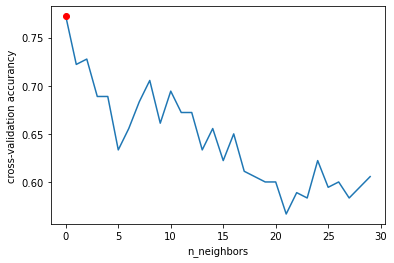

In [6]:
s = []
for i in range(30):
    clf = KNeighborsClassifier(n_neighbors= i+1)
    logo = LeaveOneGroupOut()
    scores = cross_val_score(clf, X, y, groups=groups, cv=logo)
    s.append(scores.mean())
# print(s)

print('Maximum accuracy score: ', max(s))
print('The best k neighbors: ', s.index(max(s)) + 1)

plt.plot(s)
plt.plot(s.index(max(s)),max(s),'ro')
plt.xlabel('n_neighbors')
plt.ylabel('cross-validation accurancy')
plt.show()

### 3. Feature Selection

#### 3.1 Chi2-square filtering

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### KNN

In [8]:
# select k best features, return selected features
c2 = SelectKBest(chi2, k=200).fit_transform(X,y) # randomly select k features
clf = KNeighborsClassifier(n_neighbors= 1)
logo = LeaveOneGroupOut()
scores = cross_val_score(clf, c2, y, groups=groups, cv=logo)
print('filtering method chi2, KNN accuracy score: ', scores.mean())

filtering method chi2, KNN accuracy score:  0.8


Find the best k features to remain in KNN.

In [9]:
t = []
for j in range(1, 432, 1):
        c2_KNN = SelectKBest(chi2, k=j).fit_transform(X, y)
        clf = KNeighborsClassifier(n_neighbors= 1)
        logo = LeaveOneGroupOut()
        scores = cross_val_score(clf, c2_KNN, y, groups=groups, cv=logo)
        t.append(scores.mean())

Maximum accuracy score:  0.8333333333333334
Number of features to be retained in Chi2_KNN:  165


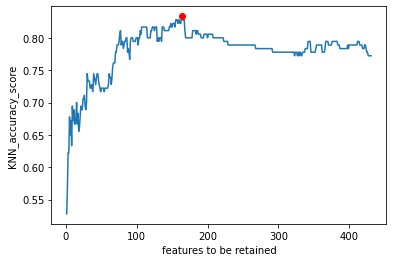

In [10]:
print('Maximum accuracy score: ',t[165-1])
print('Number of features to be retained in Chi2_KNN: ',np.arange(1, 432, 1)[np.argmax(t)])


plt.plot(np.arange(1, 432, 1),t)
plt.plot(t.index(max(t)), max(t),'ro')
plt.xlabel('features to be retained')
plt.ylabel('KNN_accuracy_score')
plt.show()

##### SVM

In [11]:
# select k best features, return selected features
c2 = SelectKBest(chi2, k=200).fit_transform(X,y) # randomly select k features
clf1= LinearSVC(dual=False,max_iter= 10000)        
scores1 = cross_val_score(clf1, c2, y, groups=groups, cv=logo)
print('filtering method chi2, SVM accuracy score: ', scores1.mean())

filtering method chi2, SVM accuracy score:  0.8555555555555556


Find the best k features to remain in KNN.

In [12]:
t2 = []
for j in range(1, 432, 1):
        c2_SVM = SelectKBest(chi2, k=j).fit_transform(X, y)
        clf1= LinearSVC(dual=False,max_iter= 10000)       
        scores1 = cross_val_score(clf1, c2_SVM, y, groups=groups, cv=logo)
        t2.append(scores1.mean())

Maximum accuracy score:  0.8999999999999999
Number of features to be retained in Chi2_SVM:  337


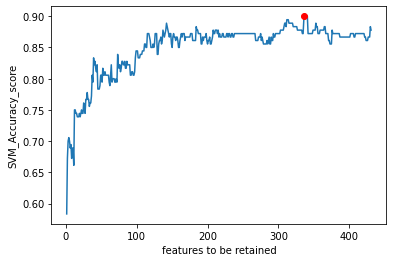

In [13]:
print('Maximum accuracy score: ',t2[337-1])
print('Number of features to be retained in Chi2_SVM: ',np.arange(1, 432, 1)[np.argmax(t2)])

plt.plot(np.arange(1, 432, 1),t2)
plt.plot(t2.index(max(t2)), max(t2),'ro')
plt.xlabel('features to be retained')
plt.ylabel('SVM_Accuracy_score')
plt.show()

#### 3.2 Backward feature elimination

In [14]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

##### 3.2.1 Logistic Regression

In [15]:
rfecv1=RFECV(estimator=LogisticRegression(max_iter=300),step=1,cv =logo,scoring='accuracy')
a = rfecv1.fit(X,y,groups)
b = a.transform(X)

Number of features to be retained in RFE_Logistic: : 260
Maximum accuracy score:  0.8555555555555556


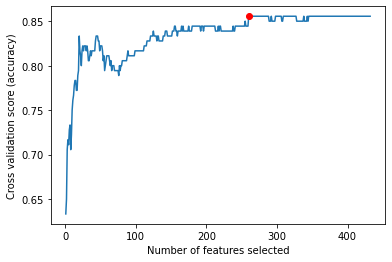

In [16]:
log = LogisticRegression(max_iter= 300)
scores = []
scores =cross_val_score(log, b, y, groups=groups, cv = logo, scoring='accuracy')

# print(scores)
print("Number of features to be retained in RFE_Logistic: : %d" % rfecv1.n_features_)
# print('Maximum accuracy score: ', scores.mean())
print('Maximum accuracy score: ', max(rfecv1.cv_results_['mean_test_score']))

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv1.cv_results_['mean_test_score']) + 1),rfecv1.cv_results_['mean_test_score'])
plt.plot(rfecv1.n_features_, max(rfecv1.cv_results_['mean_test_score']), 'ro')
plt.show()

#### SVM 

In [17]:
rfecv2=RFECV(estimator=LinearSVC(dual=False,max_iter= 10000),step=1,cv= logo,scoring='accuracy')
a = rfecv2.fit(X,y,groups)
b = a.transform(X)

Number of features to be retained in RFE_SVM: : 349
123Maximum accuracy score:  0.8833333333333334


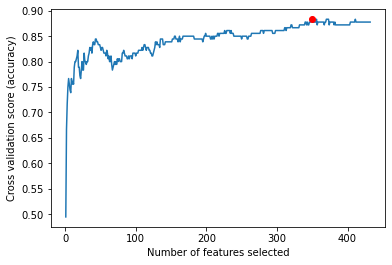

In [18]:
LSV = LinearSVC(dual=False,max_iter= 10000)
scores =cross_val_score(LSV, b, y, groups=groups, cv = logo, scoring='accuracy')

# print(scores)
print("Number of features to be retained in RFE_SVM: : %d" % rfecv2.n_features_)
# print('Maximum accuracy score: ', scores.mean())
print('123Maximum accuracy score: ', max(rfecv2.cv_results_['mean_test_score']))


plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv2.cv_results_['mean_test_score']) + 1),rfecv2.cv_results_['mean_test_score'])
plt.plot(rfecv2.n_features_, max(rfecv2.cv_results_['mean_test_score']), 'ro')
plt.show()
# print(max(rfecv2.cv_results_['mean_test_score']))

#### 3.3 L1,L2 Regularization embedding

#### Logistic Regression

In [19]:
LR = SelectFromModel(LogisticRegression(penalty="l1",solver='liblinear',max_iter= 300)).fit_transform(X, y)
print(LR.shape)
log_L1 = LogisticRegression(max_iter= 300).fit(LR, y)
scores =cross_val_score(log_L1, LR, y, groups=groups, cv = logo)
print(scores)

(180, 43)
[0.7 1.  0.9 0.8 1.  1.  0.9 0.9 1.  1.  0.9 0.8 0.9 0.9 0.9 0.9 0.9 0.8]


In [20]:
print('Losgistic Regression:')
print('Number of features to be retained, Linear Regression with L1 penalty: ', LR.shape[1])
print('Logistic Regression accuracy score with L1 penalty: ', scores.mean())

Losgistic Regression:
Number of features to be retained, Linear Regression with L1 penalty:  43
Logistic Regression accuracy score with L1 penalty:  0.8999999999999999


#### SVM

In [21]:
LSVM = SelectFromModel(LinearSVC(penalty='l1',dual=False,max_iter= 10000)).fit_transform(X, y)
print(LSVM.shape)
SVM_L1 = LinearSVC(dual=False,max_iter= 10000).fit(LR, y)
scores =cross_val_score(SVM_L1, LSVM, y, groups=groups, cv = logo)
print(scores)

(180, 60)
[0.9 1.  1.  1.  1.  1.  1.  0.9 1.  1.  1.  0.9 0.9 1.  1.  1.  1.  1. ]


In [22]:
print('SVM:')
print('Number of features to be retained, Linear SVM with L1 penalty: ',LSVM.shape[1])
print('Linear SVM accuracy score with L1 penalty: ', scores.mean())

SVM:
Number of features to be retained, Linear SVM with L1 penalty:  60
Linear SVM accuracy score with L1 penalty:  0.9777777777777779


#### Visualisation

#### Observe the distribution of the characteristics of 180 samples in histogram (using cumulative distribution function, etc.)

In [23]:
# plotting data in 2D with axes sampled 
# a) at random 
# b) from same electrode
# c) from same feature type
num_features = 9
num_electrodes = 48


#### Randomly select in 432 feature in 180 samples

In [24]:
# a) indices drawn at random
print(X.shape)
i0, i1 = np.random.randint(0, X.shape[1], size=2)
print(i0, i1)

(180, 432)
99 227


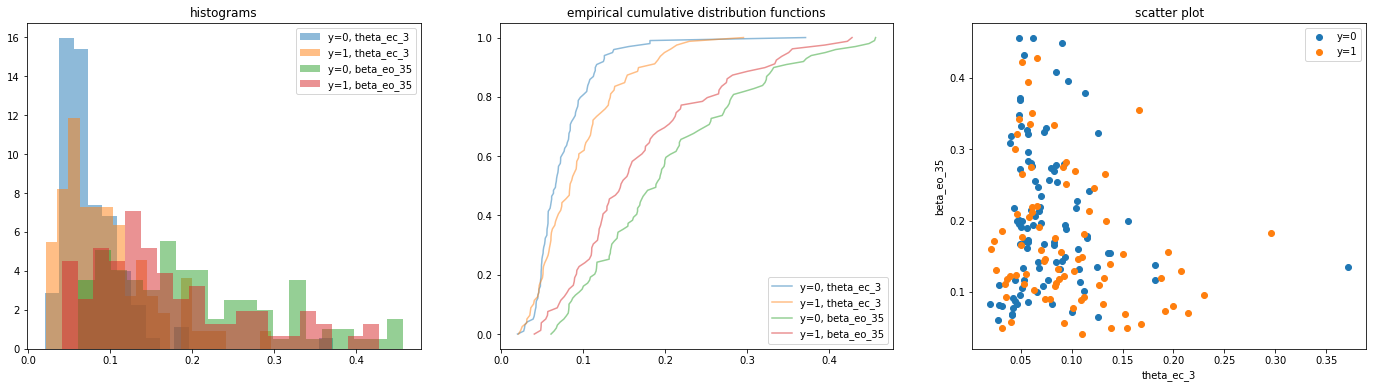

In [25]:
# select features i0, i1 and separate by class
X00, X01 = X[y==0][:,i0], X[y==1][:,i0]
X10, X11 = X[y==0][:,i1], X[y==1][:,i1]

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = ['blue', 'red']

# plot cumulative distribution of feature i0 separate for each class
axes[0].hist(X00, bins=20, label='y=0, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X01, bins=20, label='y=1, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X10, bins=20, label='y=0, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].hist(X11, bins=20, label='y=1, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].set_title('histograms')
axes[0].legend()

axes[1].plot(np.sort(X00), np.linspace(0,1,X00.shape[0]), label='y=0, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X01), np.linspace(0,1,X01.shape[0]), label='y=1, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X10), np.linspace(0,1,X10.shape[0]), label='y=0, '+ feature_names[i1], alpha=0.5)
axes[1].plot(np.sort(X11), np.linspace(0,1,X11.shape[0]), label='y=1, '+ feature_names[i1], alpha=0.5)
axes[1].set_title('empirical cumulative distribution functions')
axes[1].legend()

axes[2].scatter(X00, X10, label='y=0')
axes[2].scatter(X01, X11, label='y=1')
axes[2].set_xlabel(feature_names[i0])
axes[2].set_ylabel(feature_names[i1])
axes[2].set_title('scatter plot')
axes[2].legend()

#### Randomly select in 432 feature in 180 samples (same electrode, different features)

In [26]:
# b) same electrode, different feature (uncomment lines below) same electrode, defferent features
f0, f1 = np.random.randint(0, num_features, size=2) #feature index 0~8
e = np.random.randint(0, num_electrodes) #electrode index 0~47
i0, i1 = f0*num_electrodes + e, f1*num_electrodes + e #index

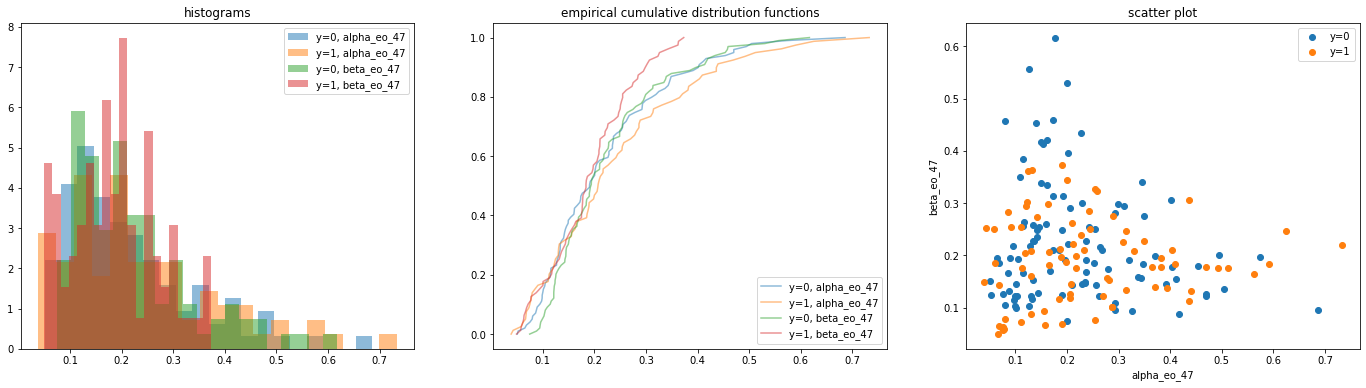

In [27]:
# select features i0, i1 and separate by class
X00, X01 = X[y==0][:,i0], X[y==1][:,i0]
X10, X11 = X[y==0][:,i1], X[y==1][:,i1]

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = ['blue', 'red']

# plot cumulative distribution of feature i0 separate for each class
axes[0].hist(X00, bins=20, label='y=0, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X01, bins=20, label='y=1, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X10, bins=20, label='y=0, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].hist(X11, bins=20, label='y=1, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].set_title('histograms')
axes[0].legend()

axes[1].plot(np.sort(X00), np.linspace(0,1,X00.shape[0]), label='y=0, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X01), np.linspace(0,1,X01.shape[0]), label='y=1, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X10), np.linspace(0,1,X10.shape[0]), label='y=0, '+ feature_names[i1], alpha=0.5)
axes[1].plot(np.sort(X11), np.linspace(0,1,X11.shape[0]), label='y=1, '+ feature_names[i1], alpha=0.5)
axes[1].set_title('empirical cumulative distribution functions')
axes[1].legend()

axes[2].scatter(X00, X10, label='y=0')
axes[2].scatter(X01, X11, label='y=1')
axes[2].set_xlabel(feature_names[i0])
axes[2].set_ylabel(feature_names[i1])
axes[2].set_title('scatter plot')
axes[2].legend()

In [28]:
# c) same feature, different electrode (uncomment lines below) same electrode, defferent features i0,i1
f = np.random.randint(0, num_features) #feature index 0~8
e0, e1 = np.random.randint(0, num_electrodes, size=2)  #electrode index 0~47
i0, i1 = f*num_electrodes + e0, f*num_electrodes + e1 #index

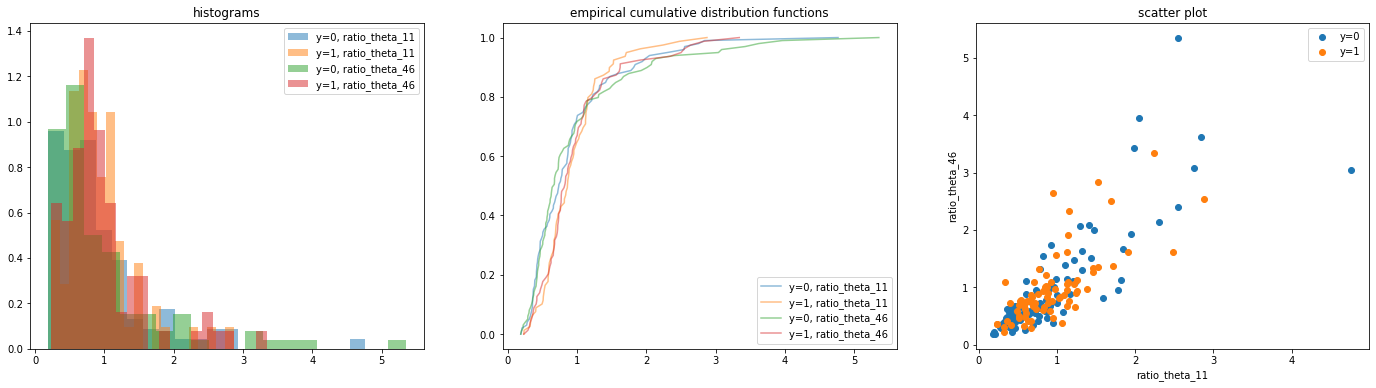

In [29]:
# select features i0, i1 and separate by class
X00, X01 = X[y==0][:,i0], X[y==1][:,i0]
X10, X11 = X[y==0][:,i1], X[y==1][:,i1]

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
colors = ['blue', 'red']

# plot cumulative distribution of feature i0 separate for each class
axes[0].hist(X00, bins=20, label='y=0, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X01, bins=20, label='y=1, '+ feature_names[i0], density=True, alpha=0.5)
axes[0].hist(X10, bins=20, label='y=0, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].hist(X11, bins=20, label='y=1, '+ feature_names[i1], density=True, alpha=0.5)
axes[0].set_title('histograms')
axes[0].legend()

axes[1].plot(np.sort(X00), np.linspace(0,1,X00.shape[0]), label='y=0, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X01), np.linspace(0,1,X01.shape[0]), label='y=1, '+ feature_names[i0], alpha=0.5)
axes[1].plot(np.sort(X10), np.linspace(0,1,X10.shape[0]), label='y=0, '+ feature_names[i1], alpha=0.5)
axes[1].plot(np.sort(X11), np.linspace(0,1,X11.shape[0]), label='y=1, '+ feature_names[i1], alpha=0.5)
axes[1].set_title('empirical cumulative distribution functions')
axes[1].legend()

axes[2].scatter(X00, X10, label='y=0')
axes[2].scatter(X01, X11, label='y=1')
axes[2].set_xlabel(feature_names[i0])
axes[2].set_ylabel(feature_names[i1])
axes[2].set_title('scatter plot')
axes[2].legend()